# Sentiment analyses of twitter users about the decision on the continuation of universities online

In [1]:
import snscrape.modules.twitter as sntwitter

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np


# Data Extraction from Tweetter

In [3]:
liste=[]

In [7]:
veri = sntwitter.TwitterSearchScraper("üniversite since:2023-02-11 until:2023-02-20 lang:tr").get_items()

In [8]:
for i in veri:
    liste.append([i.date,i.content])
    

C:\Users\Meriç\AppData\Local\Temp\ipykernel_544\2871850945.py:2: FutureWarning: content is deprecated, use rawContent instead
  liste.append([i.date,i.content])


In [31]:
df=pd.DataFrame(liste,columns=["Tarih","Tweetler"])
df


,Tarih,Tweetler
0,2023-02-19 21:55:44+00:00,Hatay İskenderun'da \n Bakanlar Kurulu tarafın...
1,2023-02-19 21:55:31+00:00,@m_aliduman @MaviAsi17 Kur'an kursu öğreticile...
2,2023-02-19 21:55:17+00:00,@mkulunk Sn Külünk Bey. Üniversite öğrencileri...
3,2023-02-19 21:54:40+00:00,"@kilicdarogluk Sayin Kemal bey, depremde annes..."
4,2023-02-19 21:54:38+00:00,@mkulunk Sn Külünk Bey. Üniversite öğrencileri...
...,...,...
36905,2023-02-11 00:04:46+00:00,@DaktirJekyll @kaziklimaria @starrvynight ne b...
36906,2023-02-11 00:04:03+00:00,@ismailabimm Üniversite dibindeki şubesi öğren...
36907,2023-02-11 00:01:02+00:00,@hadis_pinari SadakAllahül aziiim. Ben bu duay...
36908,2023-02-11 00:00:52+00:00,"önemlidir. Son zamanda yayılan, yağmacıların ş..."


In [32]:
def temizle(tweet):
    tweet=re.sub('#[a-zA-ZÇŞĞÜÖİçşğüöi0-9]+'," ",tweet)
    tweet=re.sub('\n'," ",tweet)
    tweet=re.sub('@[\S]*'," ",tweet)
    tweet=re.sub('https?:\/\/\S+'," ",tweet)
    tweet=tweet.lower()
    tweet=re.sub('[^a-zA-ZÇŞĞÜÖİçşğüöi0-9]'," ",tweet)
    tweet=re.sub('^[\s]+[\s]+$'," ",tweet)
    return tweet

In [33]:
df["Temiz Tweet"]=df["Tweetler"].apply(temizle)

In [34]:
df.head()

,Tarih,Tweetler,Temiz Tweet
0,2023-02-19 21:55:44+00:00,Hatay İskenderun'da \n Bakanlar Kurulu tarafın...,hatay i skenderun da bakanlar kurulu taraf n...
1,2023-02-19 21:55:31+00:00,@m_aliduman @MaviAsi17 Kur'an kursu öğreticile...,kur an kursu öğreticileri üniversite mezun...
2,2023-02-19 21:55:17+00:00,@mkulunk Sn Külünk Bey. Üniversite öğrencileri...,sn külünk bey üniversite öğrencileri olarak...
3,2023-02-19 21:54:40+00:00,"@kilicdarogluk Sayin Kemal bey, depremde annes...",sayin kemal bey depremde annesi ve babasini...
4,2023-02-19 21:54:38+00:00,@mkulunk Sn Külünk Bey. Üniversite öğrencileri...,sn külünk bey üniversite öğrencileri olarak...


In [35]:
df.to_csv("uni.csv",index=False)

# Sentiment Analysis

In [3]:
veri=pd.read_csv("uni.csv")

### This can also be done via Google Colab.

!pip install transformers
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
sa= pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

def skor(tweet):
    return sa(tweet)[0].get("label")

veri["Skor"]=veri["Temiz Tweet"].apply(skor)


In [5]:
veri.shape

(36910, 3)

In [84]:
df=pd.read_csv("sontweet.csv")

In [85]:
df.head()

,Unnamed: 0,Tarih,Tweetler,Temiz Tweet,Skor
0,0,2023-02-19 21:55:44+00:00,Hatay İskenderun'da \n Bakanlar Kurulu tarafın...,hatay i skenderun da bakanlar kurulu taraf n...,negative
1,1,2023-02-19 21:55:31+00:00,@m_aliduman @MaviAsi17 Kur'an kursu öğreticile...,kur an kursu öğreticileri üniversite mezun...,negative
2,2,2023-02-19 21:55:17+00:00,@mkulunk Sn Külünk Bey. Üniversite öğrencileri...,sn külünk bey üniversite öğrencileri olarak...,negative
3,3,2023-02-19 21:54:40+00:00,"@kilicdarogluk Sayin Kemal bey, depremde annes...",sayin kemal bey depremde annesi ve babasini...,negative
4,4,2023-02-19 21:54:38+00:00,@mkulunk Sn Külünk Bey. Üniversite öğrencileri...,sn külünk bey üniversite öğrencileri olarak...,negative


In [86]:
veri=df.copy()

In [87]:
veri=veri.dropna()

In [88]:
veri=veri.drop("Unnamed: 0",axis=1).reset_index(drop=True)

In [89]:
def numeric_skor(tweet):
    if tweet=="negative":
        return 0
    else:
        return 1

In [90]:
veri["NumericSkor"]=veri["Skor"].apply(numeric_skor)
veri

,Tarih,Tweetler,Temiz Tweet,Skor,NumericSkor
0,2023-02-19 21:55:44+00:00,Hatay İskenderun'da \n Bakanlar Kurulu tarafın...,hatay i skenderun da bakanlar kurulu taraf n...,negative,0
1,2023-02-19 21:55:31+00:00,@m_aliduman @MaviAsi17 Kur'an kursu öğreticile...,kur an kursu öğreticileri üniversite mezun...,negative,0
2,2023-02-19 21:55:17+00:00,@mkulunk Sn Külünk Bey. Üniversite öğrencileri...,sn külünk bey üniversite öğrencileri olarak...,negative,0
3,2023-02-19 21:54:40+00:00,"@kilicdarogluk Sayin Kemal bey, depremde annes...",sayin kemal bey depremde annesi ve babasini...,negative,0
4,2023-02-19 21:54:38+00:00,@mkulunk Sn Külünk Bey. Üniversite öğrencileri...,sn külünk bey üniversite öğrencileri olarak...,negative,0
...,...,...,...,...,...
36905,2023-02-11 00:04:46+00:00,@DaktirJekyll @kaziklimaria @starrvynight ne b...,ne bilgimiz olmad ğ ndan bahsediyorsun ...,negative,0
36906,2023-02-11 00:04:03+00:00,@ismailabimm Üniversite dibindeki şubesi öğren...,üniversite dibindeki şubesi öğrenci olmad ğ ...,negative,0
36907,2023-02-11 00:01:02+00:00,@hadis_pinari SadakAllahül aziiim. Ben bu duay...,sadakallahül aziiim ben bu duay üniversite...,positive,1
36908,2023-02-11 00:00:52+00:00,"önemlidir. Son zamanda yayılan, yağmacıların ş...",önemlidir son zamanda yay lan yağmac lar n ş...,negative,0


<AxesSubplot:>

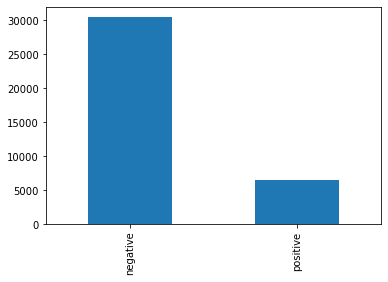

In [91]:
veri["Skor"].value_counts().plot(kind="bar")

[82.57924681658088, 17.420753183419126]


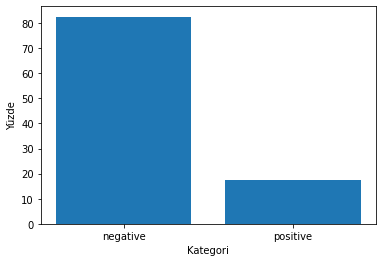

In [92]:
categories = veri['Skor'].unique()
counts = []
for category in categories:
    count = len(veri[veri['Skor'] == category])
    counts.append(count)

total_count = sum(counts)
yuzdeler = [(count / total_count) * 100 for count in counts]
print(yuzdeler)

plt.bar(categories, yüzdeler)
plt.xlabel('Kategori')
plt.ylabel('Yüzde')
plt.show()

In [93]:
veri['Tarih'] = pd.to_datetime(veri['Tarih'], errors='coerce').dt.floor('d')

In [94]:
veri['Tarih'] = veri['Tarih'].dt.date

In [95]:
group=veri["NumericSkor"].groupby(veri["Tarih"]).mean().reset_index()
group["Tarih"]=pd.to_datetime(group["Tarih"])
group

,Tarih,NumericSkor
0,2023-02-11,0.142048
1,2023-02-12,0.153502
2,2023-02-13,0.193457
3,2023-02-14,0.207452
4,2023-02-15,0.203990
5,2023-02-16,0.201609
6,2023-02-17,0.217209
7,2023-02-18,0.206033
8,2023-02-19,0.189723


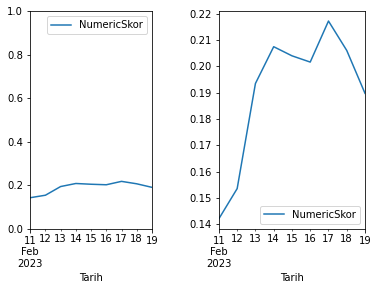

In [109]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.2])
ax1 = plt.subplot(gs[0])
ax1.set_ylim([0, 1])
group.plot(kind="line", x="Tarih", y="NumericSkor", ax=ax1)
ax2 = plt.subplot(gs[1])
group.plot(kind="line", x="Tarih", y="NumericSkor", ax=ax2)
plt.subplots_adjust(wspace=0.5)
plt.show()

In [19]:
ilk_besbin_satir = veri.iloc[:5000]

In [20]:
frekans=(ilk_besbin_satir["Temiz Tweet"]).apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
frekans

,index,0
0,,39450.0
1,hatay,36.0
2,üzerine,30.0
3,an,121.0
4,paylaş,20.0
...,...,...
20492,yüksekögretim,1.0
20493,kampanyam,1.0
20494,neredesin,1.0
20495,günlere,1.0


<AxesSubplot:xlabel='Kelimeler'>

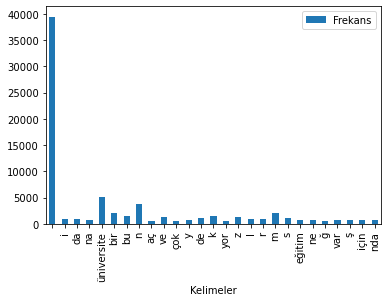

In [24]:
frekans.columns=["Kelimeler","Frekans"]
filt=frekans[frekans["Frekans"]>500]
filt.plot.bar(x="Kelimeler",y="Frekans")

In [26]:
kelimeler=dict(frekans.values)

In [25]:
from wordcloud import WordCloud

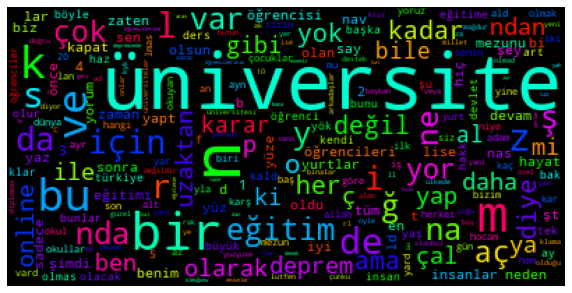

In [73]:
plt.figure(figsize=(10,10))
bulut=WordCloud(background_color="black",colormap="hsv",max_words=250,contour_width=0,contour_color="white").generate_from_frequencies(kelimeler)
plt.imshow(bulut)
plt.axis("off")
plt.show()